In [6]:
# @Author: Ivan
# @LastEdit: 2020/8/6
import time
import cv2
import numpy as np
from PIL import ImageGrab
from key_util import press_key, release_key, check_key


def up():
    release_key('A')
    release_key('D')
    release_key('S')
    press_key('W')
    #time.sleep(0.5)


def left():
    release_key('W')
    release_key('S')
    release_key('D')
    press_key('A')
    #time.sleep(0.5)


def right():
    release_key('W')
    release_key('A')
    release_key('S')
    press_key('D')
    #time.sleep(0.5)
    
def down():
    release_key('A')
    release_key('D')
    release_key('W')
    press_key('S')
    #time.sleep(0.5)    

def space():
    press_key('Space')

def keys_to_output(keys):
    output = [0, 0, 0, 0, 0]
    if 'W' in keys:
        output[0] = 1
    elif 'S' in keys:
        output[1] = 1
    elif 'A' in keys:
        output[2] = 1
    elif 'D' in keys:
        output[3] = 1        
    if 'Space' in keys:
        output[4] = 1

    return output


def countdown(sec):
    for i in range(sec, 0, -1):
        print(i)
        time.sleep(1)
    print('start!')


def main():
    countdown(4)

    last_time = time.time()
    frame, accum_time, fps = 0, 0, 0
    train_num = 10000

    train_data = []
    while True:
        # screenshot normalization
        screen = np.array(ImageGrab.grab(bbox=(0, 30, 695, 425)))
        gray = cv2.cvtColor(screen, cv2.COLOR_RGB2GRAY)
        gray = cv2.Canny(gray, 50, 150)  # edges detection        

        # get key output
        keys = check_key()
        key_output = keys_to_output(keys)
        print(key_output)

        # get train image
        train_img = gray
        train_img = cv2.resize(train_img, (278, 158))
        
        # adding train data
        train_data.append([train_img, key_output])

        print(len(train_data))
        if len(train_data) == train_num:
            np.save('train_data.npy', train_data)
            break

        # show screenshot
        #cv2.imshow('screen', train_img)
        #if cv2.waitKey(25) & 0xFF == ord('q'):
        #    cv2.destoryAllWindows()
        #    break


if __name__ == "__main__":
    main()

4
3
2
1
start!
[0, 0, 0, 0, 0]
1
[0, 0, 0, 0, 0]
2
[0, 0, 0, 0, 0]
3
[0, 0, 0, 0, 0]
4
[0, 0, 0, 0, 0]
5
[0, 0, 0, 0, 0]
6
[0, 0, 0, 0, 0]
7
[0, 0, 0, 0, 0]
8
[0, 0, 0, 0, 0]
9
[0, 0, 0, 0, 0]
10
[0, 0, 0, 0, 0]
11
[0, 0, 0, 0, 0]
12
[0, 0, 0, 0, 0]
13
[0, 0, 0, 0, 0]
14
[0, 0, 0, 0, 0]
15
[0, 0, 0, 0, 0]
16
[0, 0, 0, 0, 0]
17
[0, 0, 0, 0, 0]
18
[0, 0, 0, 0, 0]
19
[0, 0, 0, 0, 0]
20
[0, 0, 0, 0, 0]
21
[0, 0, 0, 0, 0]
22
[0, 0, 0, 0, 0]
23
[0, 0, 0, 0, 0]
24
[0, 0, 0, 0, 0]
25
[0, 0, 0, 0, 0]
26
[0, 0, 0, 0, 0]
27
[0, 0, 0, 0, 0]
28
[0, 0, 0, 0, 0]
29
[0, 0, 0, 0, 0]
30
[0, 0, 0, 0, 0]
31
[0, 0, 0, 0, 0]
32
[0, 0, 0, 0, 0]
33
[0, 0, 0, 0, 0]
34
[0, 0, 0, 0, 0]
35
[0, 0, 0, 0, 0]
36
[0, 0, 0, 0, 0]
37
[0, 0, 0, 0, 0]
38
[0, 0, 0, 0, 0]
39
[0, 0, 0, 0, 0]
40
[0, 0, 0, 0, 0]
41
[0, 0, 0, 0, 0]
42
[0, 0, 0, 0, 0]
43
[0, 0, 0, 0, 0]
44
[0, 0, 0, 0, 0]
45
[0, 0, 0, 0, 0]
46
[0, 0, 0, 0, 0]
47
[0, 0, 0, 0, 0]
48
[0, 0, 0, 0, 0]
49
[0, 0, 0, 0, 0]
50
[0, 0, 0, 0, 0]
51
[0, 0, 0, 0, 0]
52
[0, 0,

[0, 0, 0, 1, 0]
419
[1, 0, 0, 0, 0]
420
[1, 0, 0, 0, 0]
421
[1, 0, 0, 0, 0]
422
[1, 0, 0, 0, 0]
423
[1, 0, 0, 0, 0]
424
[1, 0, 0, 0, 0]
425
[1, 0, 0, 0, 0]
426
[1, 0, 0, 0, 0]
427
[1, 0, 0, 0, 0]
428
[1, 0, 0, 0, 0]
429
[1, 0, 0, 0, 0]
430
[1, 0, 0, 0, 0]
431
[1, 0, 0, 0, 0]
432
[1, 0, 0, 0, 0]
433
[1, 0, 0, 0, 0]
434
[1, 0, 0, 0, 0]
435
[1, 0, 0, 0, 0]
436
[1, 0, 0, 0, 0]
437
[1, 0, 0, 0, 0]
438
[1, 0, 0, 0, 0]
439
[1, 0, 0, 0, 0]
440
[1, 0, 0, 0, 0]
441
[1, 0, 0, 0, 0]
442
[1, 0, 0, 0, 0]
443
[1, 0, 0, 0, 0]
444
[1, 0, 0, 0, 0]
445
[1, 0, 0, 0, 0]
446
[1, 0, 0, 0, 0]
447
[1, 0, 0, 0, 0]
448
[1, 0, 0, 0, 0]
449
[1, 0, 0, 0, 0]
450
[1, 0, 0, 0, 0]
451
[1, 0, 0, 0, 0]
452
[1, 0, 0, 0, 0]
453
[1, 0, 0, 0, 0]
454
[0, 0, 0, 0, 0]
455
[0, 0, 0, 0, 0]
456
[0, 0, 0, 0, 0]
457
[0, 0, 0, 0, 0]
458
[0, 0, 0, 0, 0]
459
[0, 0, 0, 0, 0]
460
[0, 0, 0, 0, 0]
461
[0, 0, 0, 0, 0]
462
[0, 0, 0, 0, 0]
463
[0, 0, 0, 0, 0]
464
[0, 0, 0, 0, 0]
465
[0, 0, 0, 0, 0]
466
[0, 0, 0, 0, 0]
467
[0, 0, 0, 0, 0]
468


[0, 0, 0, 0, 0]
834
[0, 0, 0, 0, 0]
835
[0, 0, 0, 0, 0]
836
[0, 0, 0, 0, 0]
837
[0, 0, 0, 0, 0]
838
[0, 0, 0, 0, 0]
839
[0, 0, 0, 0, 0]
840
[0, 0, 0, 0, 0]
841
[0, 0, 0, 0, 0]
842
[0, 0, 0, 0, 0]
843
[0, 0, 0, 0, 0]
844
[0, 0, 0, 0, 0]
845
[0, 0, 0, 0, 0]
846
[0, 0, 0, 0, 0]
847
[0, 0, 0, 0, 0]
848
[0, 0, 0, 0, 0]
849
[0, 0, 0, 0, 0]
850
[0, 0, 0, 0, 0]
851
[0, 0, 0, 0, 0]
852
[0, 0, 0, 0, 0]
853
[0, 0, 0, 0, 0]
854
[0, 0, 0, 0, 0]
855
[0, 0, 0, 0, 0]
856
[0, 0, 0, 0, 0]
857
[0, 0, 0, 0, 0]
858
[0, 0, 0, 0, 0]
859
[0, 0, 0, 0, 0]
860
[0, 0, 0, 0, 0]
861
[0, 0, 0, 0, 0]
862
[0, 0, 0, 0, 0]
863
[0, 0, 0, 0, 0]
864
[0, 0, 0, 0, 0]
865
[0, 0, 0, 0, 0]
866
[0, 0, 0, 0, 0]
867
[0, 0, 0, 0, 0]
868
[0, 0, 0, 0, 0]
869
[0, 0, 0, 0, 0]
870
[0, 0, 0, 0, 0]
871
[0, 0, 0, 0, 0]
872
[0, 0, 0, 0, 0]
873
[0, 0, 0, 0, 0]
874
[0, 0, 0, 0, 0]
875
[0, 0, 0, 0, 0]
876
[0, 0, 0, 0, 0]
877
[0, 0, 0, 0, 0]
878
[0, 0, 0, 0, 0]
879
[0, 0, 0, 0, 0]
880
[0, 0, 0, 0, 0]
881
[0, 0, 0, 0, 0]
882
[0, 0, 0, 0, 0]
883


[0, 0, 0, 0, 0]
1236
[0, 0, 0, 0, 0]
1237
[0, 0, 0, 0, 0]
1238
[0, 0, 0, 0, 0]
1239
[0, 0, 0, 0, 0]
1240
[0, 0, 0, 0, 0]
1241
[0, 0, 0, 0, 0]
1242
[0, 0, 0, 0, 0]
1243
[0, 0, 0, 0, 0]
1244
[0, 0, 0, 0, 0]
1245
[0, 0, 0, 0, 0]
1246
[0, 0, 0, 0, 0]
1247
[0, 0, 0, 0, 0]
1248
[0, 0, 0, 0, 0]
1249
[0, 0, 0, 0, 0]
1250
[0, 0, 0, 0, 0]
1251
[0, 0, 0, 0, 0]
1252
[0, 0, 0, 0, 0]
1253
[0, 0, 0, 0, 0]
1254
[0, 0, 0, 0, 0]
1255
[0, 0, 0, 0, 0]
1256
[0, 0, 0, 0, 0]
1257
[0, 0, 0, 0, 0]
1258
[0, 0, 0, 0, 0]
1259
[0, 0, 0, 0, 0]
1260
[0, 0, 0, 0, 0]
1261
[0, 0, 0, 0, 0]
1262
[0, 0, 0, 0, 0]
1263
[0, 0, 0, 0, 0]
1264
[0, 0, 0, 0, 0]
1265
[0, 0, 0, 0, 0]
1266
[0, 0, 0, 0, 0]
1267
[0, 0, 0, 0, 0]
1268
[0, 0, 0, 0, 0]
1269
[0, 0, 0, 0, 0]
1270
[0, 0, 0, 0, 0]
1271
[0, 0, 0, 0, 0]
1272
[0, 0, 0, 0, 0]
1273
[0, 0, 0, 0, 0]
1274
[0, 0, 0, 0, 0]
1275
[0, 0, 0, 0, 0]
1276
[0, 0, 0, 0, 0]
1277
[0, 0, 0, 0, 0]
1278
[0, 0, 0, 0, 0]
1279
[0, 0, 0, 0, 0]
1280
[0, 0, 0, 0, 0]
1281
[0, 0, 0, 0, 0]
1282
[0, 0, 0, 0, 

[0, 0, 0, 0, 0]
1628
[0, 0, 0, 0, 0]
1629
[0, 0, 0, 0, 0]
1630
[0, 0, 0, 0, 0]
1631
[0, 0, 0, 0, 0]
1632
[0, 0, 0, 0, 0]
1633
[0, 0, 0, 0, 0]
1634
[0, 0, 0, 0, 0]
1635
[0, 0, 0, 0, 0]
1636
[0, 0, 0, 0, 0]
1637
[0, 0, 0, 0, 0]
1638
[0, 0, 0, 0, 0]
1639
[0, 0, 0, 0, 0]
1640
[0, 0, 0, 0, 0]
1641
[0, 0, 0, 0, 0]
1642
[0, 0, 0, 0, 0]
1643
[0, 0, 0, 0, 0]
1644
[0, 0, 0, 0, 0]
1645
[0, 0, 0, 0, 0]
1646
[0, 0, 0, 0, 0]
1647
[0, 0, 0, 0, 0]
1648
[0, 0, 0, 0, 0]
1649
[0, 0, 0, 0, 0]
1650
[0, 0, 0, 0, 0]
1651
[0, 0, 0, 0, 0]
1652
[0, 0, 0, 0, 0]
1653
[0, 0, 0, 0, 0]
1654
[0, 0, 0, 0, 0]
1655
[0, 0, 0, 0, 0]
1656
[0, 0, 0, 0, 0]
1657
[0, 0, 0, 0, 0]
1658
[0, 0, 0, 0, 0]
1659
[0, 0, 0, 0, 0]
1660
[0, 0, 0, 0, 0]
1661
[0, 0, 0, 0, 0]
1662
[0, 0, 0, 0, 0]
1663
[0, 0, 0, 0, 0]
1664
[0, 0, 0, 0, 0]
1665
[0, 0, 0, 0, 0]
1666
[0, 0, 0, 0, 0]
1667
[0, 0, 0, 0, 0]
1668
[0, 0, 0, 0, 0]
1669
[0, 0, 0, 0, 0]
1670
[0, 0, 0, 0, 0]
1671
[0, 0, 0, 0, 0]
1672
[0, 0, 0, 0, 0]
1673
[0, 0, 0, 0, 0]
1674
[0, 0, 0, 0, 

[0, 0, 0, 0, 0]
2024
[0, 0, 0, 0, 0]
2025
[0, 0, 0, 0, 0]
2026
[0, 0, 0, 0, 0]
2027
[0, 0, 0, 0, 0]
2028
[0, 0, 0, 0, 0]
2029
[0, 0, 0, 0, 0]
2030
[0, 0, 0, 0, 0]
2031
[0, 0, 0, 0, 0]
2032
[0, 0, 0, 0, 0]
2033
[0, 0, 0, 0, 0]
2034
[0, 0, 0, 0, 0]
2035
[0, 0, 0, 0, 0]
2036
[0, 0, 0, 0, 0]
2037
[0, 0, 0, 0, 0]
2038
[0, 0, 0, 0, 0]
2039
[0, 0, 0, 0, 0]
2040
[0, 0, 0, 0, 0]
2041
[0, 0, 0, 0, 0]
2042
[0, 0, 0, 0, 0]
2043
[0, 0, 0, 0, 0]
2044
[0, 0, 0, 0, 0]
2045
[0, 0, 0, 0, 0]
2046
[0, 0, 0, 0, 0]
2047
[0, 0, 0, 0, 0]
2048
[0, 0, 0, 0, 0]
2049
[0, 0, 0, 0, 0]
2050
[0, 0, 0, 0, 0]
2051
[0, 0, 0, 0, 0]
2052
[0, 0, 0, 0, 0]
2053
[0, 0, 0, 0, 0]
2054
[0, 0, 0, 0, 0]
2055
[0, 0, 0, 0, 0]
2056
[0, 0, 0, 0, 0]
2057
[0, 0, 0, 0, 0]
2058
[0, 0, 0, 0, 0]
2059
[0, 0, 0, 0, 0]
2060
[0, 0, 0, 0, 0]
2061
[0, 0, 0, 0, 0]
2062
[0, 0, 0, 0, 0]
2063
[0, 0, 0, 0, 0]
2064
[0, 0, 0, 0, 0]
2065
[0, 0, 0, 0, 0]
2066
[0, 0, 0, 0, 0]
2067
[0, 0, 0, 0, 0]
2068
[0, 0, 0, 0, 0]
2069
[0, 0, 0, 0, 0]
2070
[0, 0, 0, 0, 

[0, 0, 0, 0, 0]
2420
[0, 0, 0, 0, 0]
2421
[0, 0, 0, 0, 0]
2422
[0, 0, 0, 0, 0]
2423
[0, 0, 0, 0, 0]
2424
[0, 0, 0, 0, 0]
2425
[0, 0, 0, 0, 0]
2426
[0, 0, 0, 0, 0]
2427
[0, 0, 0, 0, 0]
2428
[0, 0, 0, 0, 0]
2429
[0, 0, 0, 0, 0]
2430
[0, 0, 0, 0, 0]
2431
[0, 0, 0, 0, 0]
2432
[0, 0, 0, 0, 0]
2433
[0, 0, 0, 0, 0]
2434
[0, 0, 0, 0, 0]
2435
[0, 0, 0, 0, 0]
2436
[0, 0, 0, 0, 0]
2437
[0, 0, 0, 0, 0]
2438
[0, 0, 0, 0, 0]
2439
[0, 0, 0, 0, 0]
2440
[0, 0, 0, 0, 0]
2441
[0, 0, 0, 0, 0]
2442
[0, 0, 0, 0, 0]
2443
[0, 0, 0, 0, 0]
2444
[0, 0, 0, 0, 0]
2445
[0, 0, 0, 0, 0]
2446
[0, 0, 0, 0, 0]
2447
[0, 0, 0, 0, 0]
2448
[0, 0, 0, 0, 0]
2449
[0, 0, 0, 0, 0]
2450
[0, 0, 0, 0, 0]
2451
[0, 0, 0, 0, 0]
2452
[0, 0, 0, 0, 0]
2453
[0, 0, 0, 0, 0]
2454
[0, 0, 0, 0, 0]
2455
[0, 0, 0, 0, 0]
2456
[0, 0, 0, 0, 0]
2457
[0, 0, 0, 0, 0]
2458
[0, 0, 0, 0, 0]
2459
[0, 0, 0, 0, 0]
2460
[0, 0, 0, 0, 0]
2461
[0, 0, 0, 0, 0]
2462
[0, 0, 0, 0, 0]
2463
[0, 0, 0, 0, 0]
2464
[0, 0, 0, 0, 0]
2465
[0, 0, 0, 0, 0]
2466
[0, 0, 0, 0, 

[0, 0, 0, 0, 0]
2816
[0, 0, 0, 0, 0]
2817
[0, 0, 0, 0, 0]
2818
[0, 0, 0, 0, 0]
2819
[0, 0, 0, 0, 0]
2820
[0, 0, 0, 0, 0]
2821
[0, 0, 0, 0, 0]
2822
[0, 0, 0, 0, 0]
2823
[0, 0, 0, 0, 0]
2824
[0, 0, 0, 0, 0]
2825
[0, 0, 0, 0, 0]
2826
[0, 0, 0, 0, 0]
2827
[0, 0, 0, 0, 0]
2828
[0, 0, 0, 0, 0]
2829
[0, 0, 0, 0, 0]
2830
[0, 0, 0, 0, 0]
2831
[0, 0, 0, 0, 0]
2832
[0, 0, 0, 0, 0]
2833
[0, 0, 0, 0, 0]
2834
[0, 0, 0, 0, 0]
2835
[0, 0, 0, 0, 0]
2836
[0, 0, 0, 0, 0]
2837
[0, 0, 0, 0, 0]
2838
[0, 0, 0, 0, 0]
2839
[0, 0, 0, 0, 0]
2840
[0, 0, 0, 0, 0]
2841
[0, 0, 0, 0, 0]
2842
[0, 0, 0, 0, 0]
2843
[0, 0, 0, 0, 0]
2844
[0, 0, 0, 0, 0]
2845
[0, 0, 0, 0, 0]
2846
[0, 0, 0, 0, 0]
2847
[0, 0, 0, 0, 0]
2848
[0, 0, 0, 0, 0]
2849
[0, 0, 0, 0, 0]
2850
[0, 0, 0, 0, 0]
2851
[0, 0, 0, 0, 0]
2852
[0, 0, 0, 0, 0]
2853
[0, 0, 0, 0, 0]
2854
[0, 0, 0, 0, 0]
2855
[0, 0, 0, 0, 0]
2856
[0, 0, 0, 0, 0]
2857
[0, 0, 0, 0, 0]
2858
[0, 0, 0, 0, 0]
2859
[0, 0, 0, 0, 0]
2860
[0, 0, 0, 0, 0]
2861
[0, 0, 0, 0, 0]
2862
[0, 0, 0, 0, 

[0, 0, 0, 0, 0]
3209
[0, 0, 0, 0, 0]
3210
[0, 0, 0, 0, 0]
3211
[0, 0, 0, 0, 0]
3212
[0, 0, 0, 0, 0]
3213
[0, 0, 0, 0, 0]
3214
[0, 0, 0, 0, 0]
3215
[0, 0, 0, 0, 0]
3216
[0, 0, 0, 0, 0]
3217
[0, 0, 0, 0, 0]
3218
[0, 0, 0, 0, 0]
3219
[0, 0, 0, 0, 0]
3220
[0, 0, 0, 0, 0]
3221
[0, 0, 0, 0, 0]
3222
[0, 0, 0, 0, 0]
3223
[0, 0, 0, 0, 0]
3224
[0, 0, 0, 0, 0]
3225
[0, 0, 0, 0, 0]
3226
[0, 0, 0, 0, 0]
3227
[0, 0, 0, 0, 0]
3228
[0, 0, 0, 0, 0]
3229
[0, 0, 0, 0, 0]
3230
[0, 0, 0, 0, 0]
3231
[0, 0, 0, 0, 0]
3232
[0, 0, 0, 0, 0]
3233
[0, 0, 0, 0, 0]
3234
[0, 0, 0, 0, 0]
3235
[0, 0, 0, 0, 0]
3236
[0, 0, 0, 0, 0]
3237
[0, 0, 0, 0, 0]
3238
[0, 0, 0, 0, 0]
3239
[0, 0, 0, 0, 0]
3240
[0, 0, 0, 0, 0]
3241
[0, 0, 0, 0, 0]
3242
[0, 0, 0, 0, 0]
3243
[0, 0, 0, 0, 0]
3244
[0, 0, 0, 0, 0]
3245
[0, 0, 0, 0, 0]
3246
[0, 0, 0, 0, 0]
3247
[0, 0, 0, 0, 0]
3248
[0, 0, 0, 0, 0]
3249
[0, 0, 0, 0, 0]
3250
[0, 0, 0, 0, 0]
3251
[0, 0, 0, 0, 0]
3252
[0, 0, 0, 0, 0]
3253
[0, 0, 0, 0, 0]
3254
[0, 0, 0, 0, 0]
3255
[0, 0, 0, 0, 

[0, 0, 1, 0, 0]
3604
[0, 0, 1, 0, 0]
3605
[0, 0, 1, 0, 0]
3606
[0, 0, 1, 0, 0]
3607
[0, 0, 1, 0, 0]
3608
[0, 0, 1, 0, 0]
3609
[0, 0, 1, 0, 0]
3610
[0, 0, 1, 0, 0]
3611
[0, 0, 1, 0, 0]
3612
[0, 0, 1, 0, 0]
3613
[0, 0, 1, 0, 0]
3614
[0, 0, 1, 0, 0]
3615
[0, 0, 1, 0, 0]
3616
[0, 0, 1, 0, 0]
3617
[0, 0, 1, 0, 0]
3618
[0, 0, 1, 0, 0]
3619
[0, 0, 1, 0, 0]
3620
[0, 0, 1, 0, 0]
3621
[0, 0, 1, 0, 0]
3622
[0, 0, 1, 0, 0]
3623
[0, 0, 1, 0, 0]
3624
[0, 0, 1, 0, 0]
3625
[0, 0, 1, 0, 0]
3626
[0, 0, 1, 0, 0]
3627
[0, 0, 1, 0, 0]
3628
[0, 0, 1, 0, 0]
3629
[0, 0, 1, 0, 0]
3630
[0, 0, 1, 0, 0]
3631
[0, 0, 1, 0, 0]
3632
[0, 0, 1, 0, 0]
3633
[0, 0, 1, 0, 0]
3634
[0, 0, 1, 0, 0]
3635
[0, 0, 1, 0, 0]
3636
[0, 0, 1, 0, 0]
3637
[0, 0, 1, 0, 0]
3638
[0, 0, 1, 0, 0]
3639
[0, 0, 1, 0, 0]
3640
[0, 0, 1, 0, 0]
3641
[0, 0, 1, 0, 0]
3642
[0, 0, 1, 0, 0]
3643
[0, 0, 1, 0, 0]
3644
[0, 0, 1, 0, 0]
3645
[0, 0, 1, 0, 0]
3646
[0, 0, 1, 0, 0]
3647
[0, 0, 1, 0, 0]
3648
[0, 0, 1, 0, 0]
3649
[0, 0, 1, 0, 0]
3650
[0, 0, 1, 0, 

[0, 0, 0, 0, 0]
4000
[0, 0, 0, 0, 0]
4001
[0, 0, 0, 0, 0]
4002
[0, 0, 0, 0, 0]
4003
[0, 0, 0, 0, 0]
4004
[0, 0, 0, 0, 0]
4005
[0, 0, 0, 0, 0]
4006
[0, 0, 0, 0, 0]
4007
[0, 0, 0, 0, 0]
4008
[0, 0, 0, 0, 0]
4009
[0, 0, 0, 0, 0]
4010
[0, 0, 0, 0, 0]
4011
[0, 0, 0, 0, 0]
4012
[0, 0, 0, 0, 0]
4013
[0, 0, 0, 0, 0]
4014
[0, 0, 0, 0, 0]
4015
[0, 0, 0, 0, 0]
4016
[0, 0, 0, 0, 0]
4017
[0, 0, 0, 0, 0]
4018
[0, 0, 0, 0, 0]
4019
[0, 0, 0, 0, 0]
4020
[0, 0, 0, 0, 0]
4021
[0, 0, 0, 0, 0]
4022
[0, 0, 1, 0, 0]
4023
[0, 0, 1, 0, 0]
4024
[0, 0, 1, 0, 0]
4025
[0, 0, 1, 0, 0]
4026
[0, 0, 1, 0, 0]
4027
[0, 0, 1, 0, 0]
4028
[0, 0, 1, 0, 0]
4029
[0, 0, 1, 0, 0]
4030
[0, 0, 1, 0, 0]
4031
[0, 0, 1, 0, 0]
4032
[0, 0, 1, 0, 0]
4033
[0, 0, 1, 0, 0]
4034
[0, 0, 1, 0, 0]
4035
[0, 0, 1, 0, 0]
4036
[0, 0, 1, 0, 0]
4037
[0, 0, 1, 0, 0]
4038
[0, 0, 1, 0, 0]
4039
[0, 0, 1, 0, 0]
4040
[0, 0, 1, 0, 0]
4041
[0, 0, 1, 0, 0]
4042
[0, 0, 1, 0, 0]
4043
[0, 0, 1, 0, 0]
4044
[0, 0, 1, 0, 0]
4045
[0, 0, 1, 0, 0]
4046
[0, 0, 1, 0, 

[0, 0, 0, 0, 0]
4391
[0, 0, 0, 0, 0]
4392
[0, 0, 0, 0, 0]
4393
[0, 0, 0, 0, 0]
4394
[0, 0, 0, 0, 0]
4395
[0, 0, 0, 0, 0]
4396
[0, 0, 0, 0, 0]
4397
[0, 0, 0, 0, 0]
4398
[0, 0, 0, 0, 0]
4399
[0, 0, 0, 0, 0]
4400
[0, 0, 0, 0, 0]
4401
[0, 0, 0, 0, 0]
4402
[0, 0, 0, 0, 0]
4403
[0, 0, 0, 0, 0]
4404
[0, 0, 0, 0, 0]
4405
[0, 0, 0, 0, 0]
4406
[0, 0, 0, 0, 0]
4407
[0, 0, 0, 0, 0]
4408
[0, 0, 0, 0, 0]
4409
[0, 0, 0, 0, 0]
4410
[0, 0, 0, 0, 0]
4411
[0, 0, 0, 0, 0]
4412
[0, 0, 0, 0, 0]
4413
[0, 0, 0, 0, 0]
4414
[0, 0, 0, 0, 0]
4415
[0, 0, 0, 0, 0]
4416
[0, 0, 0, 0, 0]
4417
[0, 0, 0, 0, 0]
4418
[0, 0, 0, 0, 0]
4419
[0, 0, 0, 0, 0]
4420
[0, 0, 0, 0, 0]
4421
[0, 0, 0, 0, 0]
4422
[0, 0, 0, 0, 0]
4423
[0, 0, 0, 0, 0]
4424
[0, 0, 0, 0, 0]
4425
[0, 0, 0, 0, 0]
4426
[0, 0, 0, 0, 0]
4427
[0, 0, 0, 0, 0]
4428
[0, 0, 0, 0, 0]
4429
[0, 0, 1, 0, 0]
4430
[0, 0, 1, 0, 0]
4431
[0, 0, 1, 0, 0]
4432
[0, 0, 1, 0, 0]
4433
[0, 0, 1, 0, 0]
4434
[0, 0, 1, 0, 0]
4435
[0, 0, 1, 0, 0]
4436
[0, 0, 1, 0, 0]
4437
[0, 0, 1, 0, 

[1, 0, 0, 0, 0]
4784
[1, 0, 0, 0, 0]
4785
[1, 0, 0, 0, 0]
4786
[1, 0, 0, 0, 0]
4787
[1, 0, 0, 0, 0]
4788
[1, 0, 0, 0, 0]
4789
[0, 0, 0, 0, 0]
4790
[0, 0, 0, 0, 0]
4791
[0, 0, 0, 0, 0]
4792
[0, 0, 0, 0, 0]
4793
[0, 0, 0, 0, 0]
4794
[0, 0, 0, 0, 0]
4795
[0, 0, 0, 0, 0]
4796
[0, 0, 0, 0, 0]
4797
[0, 0, 0, 0, 0]
4798
[0, 0, 0, 0, 0]
4799
[0, 0, 0, 0, 0]
4800
[0, 0, 0, 0, 0]
4801
[0, 0, 0, 0, 0]
4802
[0, 0, 0, 0, 0]
4803
[0, 0, 0, 0, 0]
4804
[0, 0, 0, 0, 0]
4805
[0, 0, 0, 0, 0]
4806
[0, 0, 0, 0, 0]
4807
[0, 0, 0, 0, 0]
4808
[0, 0, 0, 0, 0]
4809
[0, 0, 0, 0, 0]
4810
[0, 0, 0, 0, 0]
4811
[0, 0, 0, 0, 0]
4812
[0, 0, 0, 0, 0]
4813
[0, 0, 0, 0, 0]
4814
[0, 0, 0, 0, 0]
4815
[0, 0, 0, 0, 0]
4816
[0, 0, 0, 0, 0]
4817
[0, 0, 0, 0, 0]
4818
[0, 0, 0, 0, 0]
4819
[0, 0, 0, 0, 0]
4820
[0, 0, 0, 0, 0]
4821
[0, 0, 0, 0, 0]
4822
[0, 0, 0, 0, 0]
4823
[0, 0, 0, 0, 0]
4824
[0, 0, 0, 0, 0]
4825
[0, 0, 0, 0, 0]
4826
[0, 0, 0, 0, 0]
4827
[0, 0, 0, 0, 0]
4828
[0, 0, 0, 0, 0]
4829
[0, 0, 0, 0, 0]
4830
[0, 0, 0, 0, 

[0, 0, 0, 0, 0]
5178
[0, 0, 0, 0, 0]
5179
[0, 0, 0, 0, 0]
5180
[0, 0, 0, 0, 0]
5181
[0, 0, 0, 0, 0]
5182
[0, 0, 0, 0, 0]
5183
[0, 0, 0, 0, 0]
5184
[0, 0, 0, 0, 0]
5185
[0, 0, 0, 0, 0]
5186
[0, 0, 0, 0, 0]
5187
[0, 0, 0, 0, 0]
5188
[0, 0, 0, 0, 0]
5189
[0, 0, 0, 0, 0]
5190
[0, 0, 0, 0, 0]
5191
[0, 0, 0, 0, 0]
5192
[0, 0, 0, 0, 0]
5193
[0, 0, 0, 0, 0]
5194
[0, 0, 0, 0, 0]
5195
[0, 0, 0, 0, 0]
5196
[0, 0, 0, 0, 0]
5197
[0, 0, 0, 0, 0]
5198
[0, 0, 0, 0, 0]
5199
[0, 0, 0, 0, 0]
5200
[0, 0, 0, 0, 0]
5201
[0, 0, 0, 0, 0]
5202
[0, 0, 0, 0, 0]
5203
[0, 0, 0, 0, 0]
5204
[0, 0, 0, 0, 0]
5205
[0, 0, 0, 0, 0]
5206
[0, 0, 1, 0, 0]
5207
[0, 0, 1, 0, 0]
5208
[0, 0, 1, 0, 0]
5209
[0, 0, 1, 0, 0]
5210
[0, 0, 1, 0, 0]
5211
[0, 0, 1, 0, 0]
5212
[0, 0, 1, 0, 0]
5213
[0, 0, 1, 0, 0]
5214
[0, 0, 1, 0, 0]
5215
[0, 0, 1, 0, 0]
5216
[0, 0, 1, 0, 0]
5217
[0, 0, 1, 0, 0]
5218
[0, 0, 1, 0, 0]
5219
[0, 0, 1, 0, 0]
5220
[0, 0, 1, 0, 0]
5221
[0, 0, 1, 0, 0]
5222
[0, 0, 1, 0, 0]
5223
[0, 0, 1, 0, 0]
5224
[0, 0, 1, 0, 

[0, 0, 0, 0, 0]
5570
[0, 0, 0, 0, 0]
5571
[0, 0, 0, 0, 0]
5572
[0, 0, 0, 0, 0]
5573
[0, 0, 0, 0, 0]
5574
[0, 0, 0, 0, 0]
5575
[0, 0, 0, 0, 0]
5576
[0, 0, 0, 0, 0]
5577
[0, 0, 0, 0, 0]
5578
[0, 0, 0, 0, 0]
5579
[0, 0, 0, 0, 0]
5580
[0, 0, 0, 0, 0]
5581
[0, 0, 0, 0, 0]
5582
[0, 0, 0, 0, 0]
5583
[0, 0, 0, 0, 0]
5584
[0, 0, 0, 0, 0]
5585
[0, 0, 0, 0, 0]
5586
[0, 0, 0, 0, 0]
5587
[0, 0, 0, 0, 0]
5588
[0, 0, 0, 0, 0]
5589
[0, 0, 0, 0, 0]
5590
[0, 0, 0, 0, 0]
5591
[0, 0, 0, 0, 0]
5592
[0, 0, 0, 0, 0]
5593
[0, 0, 0, 0, 0]
5594
[0, 0, 0, 0, 0]
5595
[0, 0, 0, 0, 0]
5596
[0, 0, 0, 0, 0]
5597
[0, 0, 0, 0, 0]
5598
[0, 0, 0, 0, 0]
5599
[0, 0, 0, 0, 0]
5600
[0, 0, 0, 0, 0]
5601
[0, 0, 0, 0, 0]
5602
[0, 0, 0, 0, 0]
5603
[0, 0, 0, 0, 0]
5604
[0, 0, 0, 0, 0]
5605
[0, 0, 0, 0, 0]
5606
[0, 0, 0, 0, 0]
5607
[0, 0, 0, 0, 0]
5608
[0, 0, 0, 0, 0]
5609
[0, 0, 0, 0, 0]
5610
[0, 0, 0, 0, 0]
5611
[0, 0, 0, 0, 0]
5612
[0, 0, 0, 0, 0]
5613
[0, 0, 0, 0, 0]
5614
[0, 0, 0, 0, 0]
5615
[0, 0, 0, 0, 0]
5616
[0, 0, 0, 0, 

[0, 0, 1, 0, 0]
5964
[0, 0, 1, 0, 0]
5965
[0, 0, 1, 0, 0]
5966
[0, 0, 1, 0, 0]
5967
[0, 0, 1, 0, 0]
5968
[0, 0, 1, 0, 0]
5969
[0, 0, 1, 0, 0]
5970
[0, 0, 1, 0, 0]
5971
[0, 0, 1, 0, 0]
5972
[0, 0, 1, 0, 0]
5973
[0, 0, 1, 0, 0]
5974
[0, 0, 1, 0, 0]
5975
[0, 0, 1, 0, 0]
5976
[0, 0, 1, 0, 0]
5977
[0, 0, 1, 0, 0]
5978
[0, 0, 1, 0, 0]
5979
[0, 0, 1, 0, 0]
5980
[0, 0, 1, 0, 0]
5981
[0, 0, 1, 0, 0]
5982
[0, 0, 1, 0, 0]
5983
[0, 0, 1, 0, 0]
5984
[0, 0, 1, 0, 0]
5985
[0, 0, 1, 0, 0]
5986
[0, 0, 1, 0, 0]
5987
[0, 0, 1, 0, 0]
5988
[0, 0, 1, 0, 0]
5989
[0, 0, 1, 0, 0]
5990
[0, 0, 1, 0, 0]
5991
[0, 0, 1, 0, 0]
5992
[0, 0, 1, 0, 0]
5993
[0, 0, 1, 0, 0]
5994
[0, 0, 1, 0, 0]
5995
[1, 0, 0, 0, 0]
5996
[1, 0, 0, 0, 0]
5997
[1, 0, 0, 0, 0]
5998
[1, 0, 0, 0, 0]
5999
[1, 0, 0, 0, 0]
6000
[1, 0, 0, 0, 0]
6001
[1, 0, 0, 0, 0]
6002
[1, 0, 0, 0, 0]
6003
[1, 0, 0, 0, 0]
6004
[1, 0, 0, 0, 0]
6005
[1, 0, 0, 0, 0]
6006
[1, 0, 0, 0, 0]
6007
[1, 0, 0, 0, 0]
6008
[1, 0, 0, 0, 0]
6009
[1, 0, 0, 0, 0]
6010
[1, 0, 0, 0, 

[0, 0, 0, 0, 0]
6357
[0, 0, 0, 0, 0]
6358
[0, 0, 0, 0, 0]
6359
[0, 0, 0, 0, 0]
6360
[0, 0, 0, 0, 0]
6361
[0, 0, 0, 0, 0]
6362
[0, 0, 0, 0, 0]
6363
[0, 0, 0, 0, 0]
6364
[0, 0, 0, 0, 0]
6365
[0, 0, 0, 0, 0]
6366
[0, 0, 0, 0, 0]
6367
[0, 0, 0, 0, 0]
6368
[0, 0, 0, 0, 0]
6369
[0, 0, 0, 0, 0]
6370
[0, 0, 0, 0, 0]
6371
[0, 0, 0, 0, 0]
6372
[0, 0, 0, 0, 0]
6373
[0, 0, 0, 0, 0]
6374
[0, 0, 0, 0, 0]
6375
[0, 0, 0, 0, 0]
6376
[0, 0, 0, 0, 0]
6377
[0, 0, 0, 0, 0]
6378
[0, 0, 0, 0, 0]
6379
[0, 0, 0, 0, 0]
6380
[0, 0, 0, 0, 0]
6381
[0, 0, 0, 0, 0]
6382
[0, 0, 0, 0, 0]
6383
[0, 0, 0, 0, 0]
6384
[0, 0, 0, 0, 0]
6385
[0, 0, 0, 0, 0]
6386
[0, 0, 0, 0, 0]
6387
[0, 0, 0, 0, 0]
6388
[0, 0, 0, 0, 0]
6389
[0, 0, 0, 0, 0]
6390
[0, 0, 0, 0, 0]
6391
[0, 0, 0, 0, 0]
6392
[0, 0, 0, 0, 0]
6393
[0, 0, 0, 0, 0]
6394
[0, 0, 0, 0, 0]
6395
[0, 0, 0, 0, 0]
6396
[0, 0, 0, 0, 0]
6397
[0, 0, 0, 0, 0]
6398
[0, 0, 0, 0, 0]
6399
[0, 0, 0, 0, 0]
6400
[0, 0, 0, 0, 0]
6401
[0, 0, 0, 0, 0]
6402
[0, 0, 0, 0, 0]
6403
[0, 0, 0, 0, 

[0, 0, 1, 0, 0]
6750
[0, 0, 1, 0, 0]
6751
[0, 0, 1, 0, 0]
6752
[0, 0, 1, 0, 0]
6753
[0, 0, 1, 0, 0]
6754
[0, 0, 1, 0, 0]
6755
[0, 0, 1, 0, 0]
6756
[0, 0, 1, 0, 0]
6757
[0, 0, 1, 0, 0]
6758
[0, 0, 1, 0, 0]
6759
[0, 0, 1, 0, 0]
6760
[0, 0, 1, 0, 0]
6761
[0, 0, 1, 0, 0]
6762
[0, 0, 0, 0, 0]
6763
[0, 0, 0, 0, 0]
6764
[0, 0, 0, 0, 0]
6765
[0, 0, 0, 0, 0]
6766
[0, 0, 0, 0, 0]
6767
[0, 0, 0, 0, 0]
6768
[0, 0, 0, 0, 0]
6769
[0, 0, 0, 0, 0]
6770
[0, 0, 0, 0, 0]
6771
[0, 0, 0, 0, 0]
6772
[0, 0, 0, 0, 0]
6773
[0, 0, 0, 0, 0]
6774
[0, 0, 0, 0, 0]
6775
[0, 0, 0, 0, 0]
6776
[0, 0, 0, 0, 0]
6777
[0, 0, 0, 0, 0]
6778
[0, 0, 0, 0, 0]
6779
[0, 0, 0, 0, 0]
6780
[0, 0, 0, 0, 0]
6781
[0, 0, 0, 0, 0]
6782
[0, 0, 0, 0, 0]
6783
[0, 0, 0, 0, 0]
6784
[0, 0, 0, 0, 0]
6785
[0, 0, 0, 0, 0]
6786
[0, 0, 0, 0, 0]
6787
[0, 0, 0, 0, 0]
6788
[0, 0, 0, 0, 0]
6789
[0, 0, 0, 0, 0]
6790
[0, 0, 0, 0, 0]
6791
[0, 0, 0, 0, 0]
6792
[0, 0, 0, 0, 0]
6793
[0, 0, 0, 0, 0]
6794
[0, 0, 0, 0, 0]
6795
[0, 0, 0, 0, 0]
6796
[0, 0, 0, 0, 

[0, 0, 0, 0, 0]
7144
[0, 0, 0, 0, 0]
7145
[0, 0, 0, 0, 0]
7146
[0, 0, 0, 0, 0]
7147
[0, 0, 0, 0, 0]
7148
[0, 0, 0, 0, 0]
7149
[0, 0, 0, 0, 0]
7150
[0, 0, 0, 0, 0]
7151
[0, 0, 0, 0, 0]
7152
[0, 0, 0, 0, 0]
7153
[0, 0, 0, 0, 0]
7154
[0, 0, 0, 0, 0]
7155
[0, 0, 0, 0, 0]
7156
[0, 0, 0, 0, 0]
7157
[0, 0, 0, 0, 0]
7158
[0, 0, 0, 0, 0]
7159
[0, 0, 0, 0, 0]
7160
[0, 0, 0, 0, 0]
7161
[0, 0, 0, 0, 0]
7162
[0, 0, 0, 0, 0]
7163
[0, 0, 0, 0, 0]
7164
[0, 0, 0, 0, 0]
7165
[0, 0, 0, 0, 0]
7166
[0, 0, 0, 0, 0]
7167
[0, 0, 0, 0, 0]
7168
[0, 0, 0, 0, 0]
7169
[0, 0, 0, 0, 0]
7170
[0, 0, 0, 0, 0]
7171
[0, 0, 0, 0, 0]
7172
[0, 0, 0, 0, 0]
7173
[0, 0, 0, 0, 0]
7174
[0, 0, 0, 0, 0]
7175
[0, 0, 0, 0, 0]
7176
[0, 0, 0, 0, 0]
7177
[0, 0, 0, 0, 0]
7178
[0, 0, 0, 0, 0]
7179
[0, 0, 0, 0, 0]
7180
[0, 0, 0, 0, 0]
7181
[0, 0, 0, 0, 0]
7182
[0, 0, 0, 0, 0]
7183
[0, 0, 0, 0, 0]
7184
[0, 0, 0, 0, 0]
7185
[0, 0, 0, 0, 0]
7186
[0, 0, 0, 0, 0]
7187
[0, 0, 0, 0, 0]
7188
[0, 0, 0, 0, 0]
7189
[0, 0, 0, 0, 0]
7190
[0, 0, 0, 0, 

[0, 0, 0, 0, 0]
7535
[0, 0, 0, 0, 0]
7536
[0, 0, 0, 0, 0]
7537
[0, 0, 0, 0, 0]
7538
[0, 0, 0, 0, 0]
7539
[0, 0, 0, 0, 0]
7540
[0, 0, 0, 0, 0]
7541
[0, 0, 0, 0, 0]
7542
[0, 0, 0, 0, 0]
7543
[0, 0, 0, 0, 0]
7544
[0, 0, 0, 0, 0]
7545
[0, 0, 0, 0, 0]
7546
[0, 0, 0, 0, 0]
7547
[0, 0, 0, 0, 0]
7548
[0, 0, 0, 0, 0]
7549
[0, 0, 0, 0, 0]
7550
[0, 0, 0, 0, 0]
7551
[0, 0, 0, 0, 0]
7552
[0, 0, 0, 0, 0]
7553
[0, 0, 0, 0, 0]
7554
[0, 0, 0, 0, 0]
7555
[0, 0, 0, 0, 0]
7556
[0, 0, 0, 0, 0]
7557
[0, 0, 0, 0, 0]
7558
[0, 0, 0, 0, 0]
7559
[0, 0, 0, 0, 0]
7560
[0, 0, 0, 0, 0]
7561
[0, 0, 0, 0, 0]
7562
[0, 0, 0, 0, 0]
7563
[0, 0, 0, 0, 0]
7564
[0, 0, 0, 0, 0]
7565
[0, 0, 0, 0, 0]
7566
[0, 0, 0, 0, 0]
7567
[0, 0, 0, 0, 0]
7568
[0, 0, 0, 0, 0]
7569
[0, 0, 0, 0, 0]
7570
[0, 0, 0, 0, 0]
7571
[0, 0, 0, 0, 0]
7572
[0, 0, 0, 0, 0]
7573
[0, 0, 0, 0, 0]
7574
[0, 0, 0, 0, 0]
7575
[0, 0, 0, 0, 0]
7576
[0, 0, 0, 0, 0]
7577
[0, 0, 0, 0, 0]
7578
[0, 0, 0, 0, 0]
7579
[0, 0, 0, 0, 0]
7580
[0, 0, 0, 0, 0]
7581
[0, 0, 0, 0, 

[0, 0, 0, 0, 0]
7931
[0, 0, 0, 0, 0]
7932
[0, 0, 0, 0, 0]
7933
[0, 0, 0, 0, 0]
7934
[0, 0, 0, 0, 0]
7935
[0, 0, 0, 0, 0]
7936
[0, 0, 0, 0, 0]
7937
[0, 0, 0, 0, 0]
7938
[0, 0, 0, 0, 0]
7939
[0, 0, 0, 0, 0]
7940
[0, 0, 0, 0, 0]
7941
[0, 0, 0, 0, 0]
7942
[0, 0, 0, 0, 0]
7943
[0, 0, 0, 0, 0]
7944
[0, 0, 0, 0, 0]
7945
[0, 0, 0, 0, 0]
7946
[0, 0, 0, 0, 0]
7947
[0, 0, 0, 0, 0]
7948
[0, 0, 0, 0, 0]
7949
[0, 0, 0, 0, 0]
7950
[0, 0, 0, 0, 0]
7951
[0, 0, 0, 0, 0]
7952
[0, 0, 0, 0, 0]
7953
[0, 0, 0, 0, 0]
7954
[0, 0, 0, 0, 0]
7955
[0, 0, 0, 0, 0]
7956
[0, 0, 0, 0, 0]
7957
[0, 0, 0, 0, 0]
7958
[0, 0, 0, 0, 0]
7959
[0, 0, 0, 0, 0]
7960
[0, 0, 0, 0, 0]
7961
[0, 0, 0, 0, 0]
7962
[0, 0, 0, 0, 0]
7963
[0, 0, 0, 0, 0]
7964
[0, 0, 0, 0, 0]
7965
[0, 0, 0, 0, 0]
7966
[0, 0, 0, 0, 0]
7967
[0, 0, 0, 0, 0]
7968
[0, 0, 0, 0, 0]
7969
[0, 0, 0, 0, 0]
7970
[0, 0, 0, 0, 0]
7971
[0, 0, 0, 0, 0]
7972
[0, 0, 0, 0, 0]
7973
[0, 0, 0, 0, 0]
7974
[0, 0, 0, 0, 0]
7975
[0, 0, 0, 0, 0]
7976
[0, 0, 0, 0, 0]
7977
[0, 0, 0, 0, 

[0, 0, 0, 0, 0]
8324
[0, 0, 0, 0, 0]
8325
[0, 0, 0, 0, 0]
8326
[0, 0, 0, 0, 0]
8327
[0, 0, 0, 0, 0]
8328
[0, 0, 0, 0, 0]
8329
[0, 0, 0, 0, 0]
8330
[0, 0, 0, 0, 0]
8331
[0, 0, 0, 0, 0]
8332
[0, 0, 0, 0, 0]
8333
[0, 0, 0, 0, 0]
8334
[0, 0, 0, 0, 0]
8335
[0, 0, 0, 0, 0]
8336
[0, 0, 0, 0, 0]
8337
[0, 0, 0, 0, 0]
8338
[0, 0, 0, 0, 0]
8339
[0, 0, 0, 0, 0]
8340
[0, 0, 0, 0, 0]
8341
[0, 0, 0, 0, 0]
8342
[0, 0, 0, 0, 0]
8343
[0, 0, 0, 0, 0]
8344
[0, 0, 0, 0, 0]
8345
[0, 0, 0, 0, 0]
8346
[0, 0, 0, 0, 0]
8347
[0, 0, 0, 0, 0]
8348
[0, 0, 0, 0, 0]
8349
[0, 0, 0, 0, 0]
8350
[0, 0, 0, 0, 0]
8351
[0, 0, 0, 0, 0]
8352
[0, 0, 0, 0, 0]
8353
[0, 0, 0, 0, 0]
8354
[0, 0, 0, 0, 0]
8355
[0, 0, 0, 0, 0]
8356
[0, 0, 0, 0, 0]
8357
[0, 0, 0, 0, 0]
8358
[0, 0, 0, 0, 0]
8359
[0, 0, 0, 0, 0]
8360
[0, 0, 0, 0, 0]
8361
[0, 0, 0, 0, 0]
8362
[0, 0, 0, 0, 0]
8363
[0, 0, 0, 0, 0]
8364
[0, 0, 0, 0, 0]
8365
[0, 0, 0, 0, 0]
8366
[0, 0, 0, 0, 0]
8367
[0, 0, 0, 0, 0]
8368
[0, 0, 0, 0, 0]
8369
[0, 0, 0, 0, 0]
8370
[0, 0, 0, 0, 

[0, 0, 0, 0, 0]
8719
[0, 0, 0, 0, 0]
8720
[0, 0, 0, 0, 0]
8721
[0, 0, 0, 0, 0]
8722
[0, 0, 0, 0, 0]
8723
[0, 0, 0, 0, 0]
8724
[0, 0, 0, 0, 0]
8725
[0, 0, 0, 0, 0]
8726
[0, 0, 0, 0, 0]
8727
[0, 0, 0, 0, 0]
8728
[0, 0, 0, 0, 0]
8729
[0, 0, 0, 0, 0]
8730
[0, 0, 0, 0, 0]
8731
[0, 0, 0, 0, 0]
8732
[0, 0, 0, 0, 0]
8733
[0, 0, 0, 0, 0]
8734
[0, 0, 0, 0, 0]
8735
[0, 0, 0, 0, 0]
8736
[0, 0, 0, 0, 0]
8737
[0, 0, 0, 0, 0]
8738
[0, 0, 0, 0, 0]
8739
[0, 0, 0, 0, 0]
8740
[0, 0, 0, 0, 0]
8741
[0, 0, 0, 0, 0]
8742
[0, 0, 0, 0, 0]
8743
[0, 0, 0, 0, 0]
8744
[0, 0, 0, 0, 0]
8745
[0, 0, 0, 0, 0]
8746
[0, 0, 0, 0, 0]
8747
[0, 0, 0, 0, 0]
8748
[0, 0, 0, 0, 0]
8749
[0, 0, 0, 0, 0]
8750
[0, 0, 0, 0, 0]
8751
[0, 0, 0, 0, 0]
8752
[0, 0, 0, 0, 0]
8753
[0, 0, 0, 0, 0]
8754
[0, 0, 0, 0, 0]
8755
[0, 0, 0, 0, 0]
8756
[0, 0, 0, 0, 0]
8757
[0, 0, 0, 0, 0]
8758
[0, 0, 0, 0, 0]
8759
[0, 0, 0, 0, 0]
8760
[0, 0, 0, 0, 0]
8761
[0, 0, 0, 0, 0]
8762
[0, 0, 0, 0, 0]
8763
[0, 0, 0, 0, 0]
8764
[0, 0, 0, 0, 0]
8765
[0, 0, 0, 0, 

[0, 0, 0, 0, 0]
9115
[0, 0, 0, 0, 0]
9116
[0, 0, 0, 0, 0]
9117
[0, 0, 0, 0, 0]
9118
[0, 0, 0, 0, 0]
9119
[0, 0, 0, 0, 0]
9120
[0, 0, 0, 0, 0]
9121
[0, 0, 0, 0, 0]
9122
[0, 0, 0, 0, 0]
9123
[0, 0, 0, 0, 0]
9124
[0, 0, 0, 0, 0]
9125
[0, 0, 0, 0, 0]
9126
[0, 0, 0, 0, 0]
9127
[0, 0, 0, 0, 0]
9128
[0, 0, 0, 0, 0]
9129
[0, 0, 0, 0, 0]
9130
[0, 0, 0, 0, 0]
9131
[0, 0, 0, 0, 0]
9132
[0, 0, 0, 0, 0]
9133
[0, 0, 0, 0, 0]
9134
[0, 0, 0, 0, 0]
9135
[0, 0, 0, 0, 0]
9136
[0, 0, 0, 0, 0]
9137
[0, 0, 0, 0, 0]
9138
[0, 0, 0, 0, 0]
9139
[0, 0, 0, 0, 0]
9140
[0, 0, 0, 0, 0]
9141
[0, 0, 0, 0, 0]
9142
[0, 0, 0, 0, 0]
9143
[0, 0, 0, 0, 0]
9144
[0, 0, 0, 0, 0]
9145
[0, 0, 0, 0, 0]
9146
[0, 0, 0, 0, 0]
9147
[0, 0, 0, 0, 0]
9148
[0, 0, 0, 0, 0]
9149
[0, 0, 0, 0, 0]
9150
[0, 0, 0, 0, 0]
9151
[0, 0, 0, 0, 0]
9152
[0, 0, 0, 0, 0]
9153
[0, 0, 0, 0, 0]
9154
[0, 0, 0, 0, 0]
9155
[0, 0, 0, 0, 0]
9156
[0, 0, 0, 0, 0]
9157
[0, 0, 0, 0, 0]
9158
[0, 0, 0, 0, 0]
9159
[0, 0, 0, 0, 0]
9160
[0, 0, 0, 0, 0]
9161
[0, 0, 0, 0, 

[0, 0, 0, 0, 0]
9506
[0, 0, 0, 0, 0]
9507
[0, 0, 0, 0, 0]
9508
[0, 0, 0, 0, 0]
9509
[0, 0, 0, 0, 0]
9510
[0, 0, 0, 0, 0]
9511
[0, 0, 0, 0, 0]
9512
[0, 0, 0, 0, 0]
9513
[0, 0, 0, 0, 0]
9514
[0, 0, 0, 0, 0]
9515
[0, 0, 0, 0, 0]
9516
[0, 0, 0, 0, 0]
9517
[0, 0, 0, 0, 0]
9518
[0, 0, 0, 0, 0]
9519
[0, 0, 0, 0, 0]
9520
[0, 0, 0, 0, 0]
9521
[0, 0, 0, 0, 0]
9522
[0, 0, 0, 0, 0]
9523
[0, 0, 0, 0, 0]
9524
[0, 0, 0, 0, 0]
9525
[0, 0, 0, 0, 0]
9526
[0, 0, 0, 0, 0]
9527
[0, 0, 0, 0, 0]
9528
[0, 0, 0, 0, 0]
9529
[0, 0, 0, 0, 0]
9530
[0, 0, 0, 0, 0]
9531
[0, 0, 0, 0, 0]
9532
[0, 0, 0, 0, 0]
9533
[0, 0, 0, 0, 0]
9534
[0, 0, 0, 0, 0]
9535
[0, 0, 0, 0, 0]
9536
[0, 0, 0, 0, 0]
9537
[0, 0, 0, 0, 0]
9538
[0, 0, 0, 0, 0]
9539
[0, 0, 0, 0, 0]
9540
[0, 0, 0, 0, 0]
9541
[0, 0, 0, 0, 0]
9542
[0, 0, 0, 0, 0]
9543
[0, 0, 0, 0, 0]
9544
[0, 0, 0, 0, 0]
9545
[0, 0, 0, 0, 0]
9546
[0, 0, 0, 0, 0]
9547
[0, 0, 0, 0, 0]
9548
[0, 0, 0, 0, 0]
9549
[0, 0, 0, 0, 0]
9550
[0, 0, 0, 0, 0]
9551
[0, 0, 0, 0, 0]
9552
[0, 0, 0, 0, 

[0, 0, 0, 0, 0]
9899
[0, 0, 0, 0, 0]
9900
[0, 0, 0, 0, 0]
9901
[0, 0, 0, 0, 0]
9902
[0, 0, 0, 0, 0]
9903
[0, 0, 0, 0, 0]
9904
[0, 0, 0, 0, 0]
9905
[0, 0, 0, 0, 0]
9906
[0, 0, 0, 0, 0]
9907
[0, 0, 0, 0, 0]
9908
[0, 0, 0, 0, 0]
9909
[0, 0, 0, 0, 0]
9910
[0, 0, 0, 0, 0]
9911
[0, 0, 0, 0, 0]
9912
[0, 0, 0, 0, 0]
9913
[0, 0, 0, 0, 0]
9914
[0, 0, 0, 0, 0]
9915
[0, 0, 0, 0, 0]
9916
[0, 0, 0, 0, 0]
9917
[0, 0, 0, 0, 0]
9918
[0, 0, 0, 0, 0]
9919
[0, 0, 0, 0, 0]
9920
[0, 0, 0, 0, 0]
9921
[0, 0, 0, 0, 0]
9922
[0, 0, 0, 0, 0]
9923
[0, 0, 0, 0, 0]
9924
[0, 0, 0, 0, 0]
9925
[0, 0, 0, 0, 0]
9926
[0, 0, 0, 0, 0]
9927
[0, 0, 0, 0, 0]
9928
[0, 0, 0, 0, 0]
9929
[0, 0, 0, 0, 0]
9930
[0, 0, 0, 0, 0]
9931
[0, 0, 0, 0, 0]
9932
[0, 0, 0, 0, 0]
9933
[0, 0, 0, 0, 0]
9934
[0, 0, 0, 0, 0]
9935
[0, 0, 0, 0, 0]
9936
[0, 0, 0, 0, 0]
9937
[0, 0, 0, 0, 0]
9938
[0, 0, 0, 0, 0]
9939
[0, 0, 0, 0, 0]
9940
[0, 0, 0, 0, 0]
9941
[0, 0, 0, 0, 0]
9942
[0, 0, 0, 0, 0]
9943
[0, 0, 0, 0, 0]
9944
[0, 0, 0, 0, 0]
9945
[0, 0, 0, 0, 

D:\conda\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [7]:
print("We are done!")

We are done!


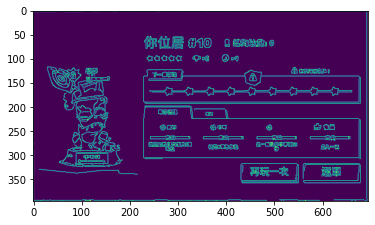

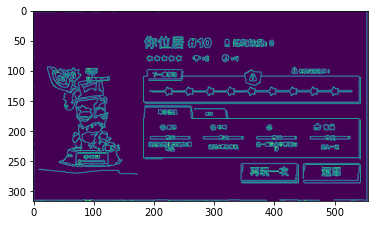

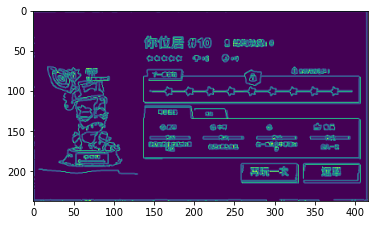

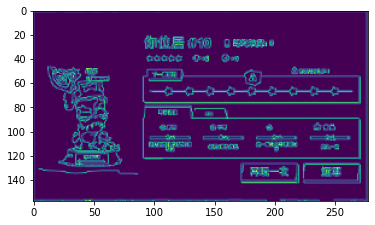

In [5]:
import numpy as np
import cv2
from PIL import ImageGrab
import matplotlib.pyplot as plt
fps=0
#a = np.load('train_data.npy',allow_pickle=True)
screen = np.array(ImageGrab.grab(bbox=(0, 30, 695, 425)))
gray = cv2.cvtColor(screen, cv2.COLOR_RGB2GRAY)
gray = cv2.Canny(gray, 50, 150)  # edges detection

plt.imshow(gray)
plt.show()
train_img = gray
train_img = cv2.resize(train_img, (556, 316))
plt.imshow(train_img)
plt.show()
train_img = cv2.resize(train_img, (417, 237))
plt.imshow(train_img)
plt.show()
train_img = cv2.resize(train_img, (278, 158))
plt.imshow(train_img)
plt.show()
